# Paso 1: Limpieza del Dataset

1. Renombre la columna "default payment next month" a "default".
2. Remueva la columna "ID".
3. Elimine los registros con informacion no disponible.
4. Para la columna EDUCATION, valores > 4 indican niveles superiores de educación, agrupe estos valores en la categoría "others". 


In [1]:
# Leer Dataset Entrenamiento
import pandas as pd 

train_data = pd.read_csv(
    "../files/input/train_data.csv.zip",
    index_col=False,
    compression="zip",
)

In [ ]:
# Leer Dataset Prueba

test_data = pd.read_csv(
    "../files/input/test_data.csv.zip",
    index_col=False,
    compression="zip",
)

In [3]:
import numpy as np

#Limpieza

def limpiar(df):
    df = df.rename(columns={"default payment next month": "default"})
    df.drop(columns=["ID"], inplace=True)
    df["EDUCATION"] = df["EDUCATION"].apply(lambda x: 4 if x > 4 else x)
    df["EDUCATION"] = df["EDUCATION"].apply(lambda x: x if x > 0 else np.nan)
    df["MARRIAGE"] = df["MARRIAGE"].apply(lambda x: x if x > 0 else np.nan)
    df.dropna(inplace=True)
    return df

train_data = limpiar(train_data)
test_data = limpiar(test_data)


# Paso 2: División del Dataset

1. Divida los datasets en x_train, y_train, x_test, y_test.

In [4]:
x_train = train_data.drop(columns=["default"])
y_train = train_data["default"]

x_test = test_data.drop(columns=["default"])
y_test = test_data["default"]

# Paso 3: Pipeline para el modelo de Clasificación

1. Transforma las variables categoricas usando el método one-hot-encoding.
2. Descompone la matriz de entrada usando componentes principales. El pca usa todas las componentes.
3. Escala la matriz de entrada al intervalo [0, 1].
4. Selecciona las K columnas mas relevantes de la matrix de entrada.
5. Ajusta una red neuronal tipo MLP.

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score,
    precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report
)

categorical_features = ['SEX','EDUCATION','MARRIAGE']
numerical_features= ['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  
        ('num', StandardScaler(), numerical_features)  
    ]
)

pipeline=Pipeline(
    [
        ("preprocessor",preprocessor),
        ('feature_selection',SelectKBest(score_func=f_classif)),
        ('pca',PCA()),
        ('classifier',MLPClassifier(max_iter=15000,random_state=17))
    ]
)


pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['SEX', 'EDUCATION',
                                                   'MARRIAGE']),
                                                 ('num', StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE', 'PAY_0',
                                                   'PAY_2', 'PAY_3', 'PAY_4',
                                                   'PAY_5', 'PAY_6',
                                                   'BILL_AMT1', 'BILL_AMT2',
                                                   'BILL_AMT3', 'BILL_AMT4',
                                                   'BILL_AMT5', 'BILL_AMT6',
                                                   'PAY_AMT1', 'PAY_AMT2',
                                                   'PAY_AMT3', 'PAY_AMT4',
                                                   'PAY_AMT5', 'PAY_AMT6'])])),
                ('feature_selection', SelectKBest()), ('pca', PCA()),
                ('classifier', MLPClassifier(max_iter=15000, random_state=17))])

# Paso 4: Optimización

1. Optimice los hiperparametros del pipeline usando validación cruzada.
2. Use 10 splits para la validación cruzada. 

    Use la función de precision balanceada para medir la precisión del modelo.

In [6]:

param_grid = {
            'pca__n_components': [None],
            'feature_selection__k':[20],
            "classifier__hidden_layer_sizes": [(50, 30, 40, 60)],
            'classifier__alpha': [0.26],
            "classifier__learning_rate_init": [0.001],
}


grid_search = GridSearchCV(
                        estimator=pipeline,
                        param_grid=param_grid,
                        scoring='balanced_accuracy',  
                        cv=10,                                        
                        n_jobs=-1,                                  
                        verbose=1,
                        refit=True                              
)
grid_search.fit(x_train, y_train)


Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE']),
                                                                        ('num',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_A...
                                                                          'PAY_AMT6'])])),
                                       ('feature_selection', SelectKBest()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        MLPClassifier(max_iter=15000,
                                                      random_state=17))]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.26],
                         'classifier__hidden_layer_sizes': [(50, 30, 40, 60)],
                         'classifier__learning_rate_init': [0.001],
                         'feature_selection__k': [20],
                         'pca__n_components': [None]},
             scoring='balanced_accuracy', verbose=1)

# Paso 5: Métricas

1. Calcule las metricas de precision, precision balanceada, recall y f1-score para los conjuntos de entrenamiento y prueba.
2. Guardelas en el archivo files/output/metrics.json. 

    Cada fila del archivo es un diccionario con las metricas de un modelo. Este diccionario tiene un campo para indicar si es el conjunto de entrenamiento o prueba. Por ejemplo:

{'type': 'metrics', 'dataset': 'train', 'precision': 0.8, 'balanced_accuracy': 0.7, 'recall': 0.9, 'f1_score': 0.85}

{'type': 'metrics', 'dataset': 'test', 'precision': 0.7, 'balanced_accuracy': 0.6, 'recall': 0.8, 'f1_score': 0.75}

In [7]:
y_train_pred = grid_search.predict(x_train)
y_test_pred = grid_search.predict(x_test)


print("Score train", grid_search.score(x_train, y_train), ">", 0.661,) 
print("Score test", grid_search.score(x_test, y_test), ">", 0.666,)
print()

train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

print("train_precision", train_precision, ">", 0.691, train_precision > 0.691) 
print("train_balanced_accuracy", train_balanced_accuracy, ">", 0.661, train_balanced_accuracy > 0.661)
print("train_recall", train_recall, ">", 0.370, train_recall > 0.370)
print("train_f1", train_f1, ">", 0.482, train_f1 > 0.482) 
print()

print("test_precision", test_precision, ">", 0.673, test_precision > 0.673)
print("test_balanced_accuracy", test_balanced_accuracy, ">", 0.661, test_balanced_accuracy > 0.661)
print("test_recall", test_recall, ">", 0.370, test_recall > 0.370)
print("test_f1", test_f1, ">", 0.482, test_f1 > 0.482) 
print()

print(train_cm[0][0], 15440, train_cm[0][0] > 15440)
print(train_cm[1][1], 1735, train_cm[1][1] > 1735)
print(test_cm[0][0], 6710, test_cm[0][0] > 6710)
print(test_cm[1][1], 730, test_cm[1][1] > 730)


Score train 0.6630025835547158 > 0.661
Score test 0.6695640976303335 > 0.666

train_precision 0.7025189924030388 > 0.691 True
train_balanced_accuracy 0.6630025835547158 > 0.661 True
train_recall 0.3718518518518519 > 0.37 True
train_f1 0.48629947412122887 > 0.482 True

test_precision 0.6846011131725418 > 0.673 True
test_balanced_accuracy 0.6695640976303335 > 0.661 True
test_recall 0.38719832109129065 > 0.37 True
test_f1 0.49463806970509383 > 0.482 True

15484 15440 True
1757 1735 True
6733 6710 True
738 730 True


# Paso 6: Matrices de Confusion

1. Calcule las matrices de confusion para los conjuntos de entrenamiento y prueba. 

2. Guardelas en el archivo files/output/metrics.json. 
    
    Cada fila del archivo es un diccionario con las metricas de un modelo de entrenamiento o prueba. Por ejemplo:

{'type': 'cm_matrix', 'dataset': 'train', 'true_0': {"predicted_0": 15562, "predicte_1": 666}, 'true_1': {"predicted_0": 3333, "predicted_1": 1444}}

{'type': 'cm_matrix', 'dataset': 'test', 'true_0': {"predicted_0": 15562, "predicte_1": 650}, 'true_1': {"predicted_0": 2490, "predicted_1": 1420}}

Matriz de Confusión (Train):
 [[15484   744]
 [ 2968  1757]]
Matriz de Confusión (Test):
 [[6733  340]
 [1168  738]]


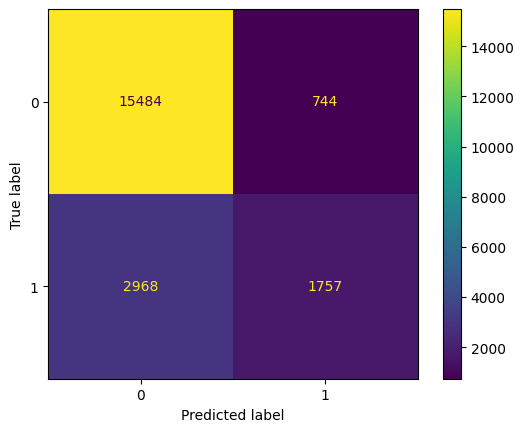

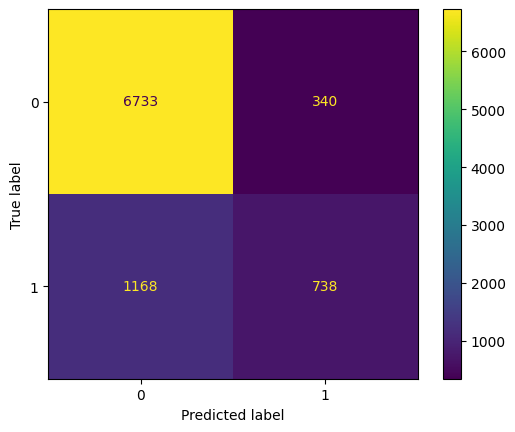

In [8]:
for dataset, y_true, y_pred in [("Train", y_train, y_train_pred), ("Test", y_test, y_test_pred)]:
    cm = confusion_matrix(y_true, y_pred)
    print(f"Matriz de Confusión ({dataset}):\n", cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
    disp.plot()

# Paso 7: Guardar el Modelo

1. Guarde el modelo (comprimido con gzip) como "files/models/model.pkl.gz". 

    Recuerde que es posible guardar el modelo comprimido usanzo la libreria gzip.

In [9]:

import pickle
import gzip

with gzip.open('../files/models/model.pkl.gz', 'wb') as file:
    pickle.dump(grid_search, file)

# Paso 8: Guardar las métricas y matriz de confusión en json

In [10]:
import json

def compute_metrics(model, X, y, dataset):
    y_pred = model.predict(X)
    metrics = classification_report(y, y_pred, output_dict=True)
    
    
    results = {
        'type': 'metrics',
        'dataset': dataset,
        'precision': metrics['1']['precision'],
        'balanced_accuracy': balanced_accuracy_score(y, y_pred),
        'recall': metrics['1']['recall'],
        'f1_score': metrics['1']['f1-score']
    }
    return results

def compute_confusion_matrix(model, X, y, dataset):
    cm = confusion_matrix(y, model.predict(X))

    
    return {
        'type': 'cm_matrix',
        'dataset': dataset,
        'true_0': {'predicted_0': int(cm[0][0]), 'predicted_1': int(cm[0][1])},
        'true_1': {'predicted_0': int(cm[1][0]), 'predicted_1': int(cm[1][1])}
    }

metrics_list = [
    compute_metrics(grid_search.best_estimator_, x_train, y_train, 'train'),
    compute_metrics(grid_search.best_estimator_, x_test, y_test, 'test')
]

cm_train = compute_confusion_matrix(grid_search.best_estimator_, x_train, y_train, 'train')
cm_test = compute_confusion_matrix(grid_search.best_estimator_, x_test, y_test, 'test')

all_results = metrics_list + [cm_train, cm_test]

with open('../files/output/metrics.json', 'w') as file:
    for result in all_results:
        file.write(json.dumps(result) + '\n')